# Digital House - Trabajo Práctico Nº1
## Desafío 1. Análisis exploratorio de un dataset de precios de propiedades
Grupo Nª2
Alumnos:
* Alberto Paparelli
* André Song
* Marianela Riz
* Gloria Caravajal
* Franco Emanuel Rodriguez
* Iván Axel Schweizer

Objetivos:
* Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar estrategias para lidiar con los datos perdidos en ciertas variables.
* Realizar un análisis descriptivo de las principales variables.
* Crear nuevas columnas a partir de las características dadas que puedan tener valor
predictivo.

In [6]:
# Lo primero que hacemos es importar todas las librerias necesarias.
import pandas as pd
import numpy as np
import re 
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Abrimos el dataset y hacemos un chequeo rápido para saber cantidad de registros y miramos la composición del mismo.
filename = "../dataset/properati.csv"
data = pd.read_csv(filename)
display(data.sample(n=6)) 
print(f"(Cantidad de Filas, Cantidad de columnas) -> {data.shape}")


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
21464,21464,sell,apartment,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3430813.0,NaN,NaN,...,85.0,NaN,2529.411765,6.0,NaN,NaN,http://www.properati.com.ar/17fix_venta_depart...,BUEN 3 AMBIENTES EN MTZ TORRE ORFEO.Cerca esta...,"Departamento con 10 Plantas en Costa, Eduardo ...",https://thumbs4.properati.com/0/2yp6TB28JTjwVS...
91878,91878,sell,house,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,...,296.0,913.580247,1250.000000,NaN,NaN,NaN,http://www.properati.com.ar/1bc5h_venta_casa_c...,HDH Propiedades presenta a la venta una Casa e...,Casa a estrenar 3 dormitorios,https://thumbs4.properati.com/5/mfiCvgZbeBJl0w...
96603,96603,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,NaN,NaN,...,54.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1bixj_venta_depart...,Sergio Villella Inmobiliaria presenta departam...,Paraguay 2100 - Departamento de un dormitorio ...,https://thumbs4.properati.com/0/BKyTc86Nkn3v4u...
67891,67891,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,3429244.0,NaN,NaN,...,200.0,900.000000,900.000000,NaN,NaN,NaN,http://www.properati.com.ar/1ag00_venta_casa_s...,A 7 cuadras de la estación de S.A. de Padua he...,Hermoso Chalet a 7 cuadras de la estacion de S...,https://thumbs4.properati.com/5/pE4zvQabfPSlQr...
64421,64421,sell,apartment,Olivos,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430310.0,NaN,NaN,...,60.0,NaN,4500.000000,NaN,NaN,NaN,http://www.properati.com.ar/1aav4_venta_depart...,TORRE RIOAlquilado por 6 meses más con renta d...,Corrientes 377,https://thumbs4.properati.com/3/MlEr_7KI_IBWnv...
119736,119736,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|La ...,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.913059,-57.950622",-34.913059,...,104.0,NaN,1365.384615,8.0,4.0,NaN,http://www.properati.com.ar/1ch1d_venta_depart...,Corredor Responsable: Mauro Perri - CDCPDJLP 7...,Departamento de 3 dormitorios en excelente estado,https://thumbs4.properati.com/2/czAecrGFzkjWk5...


(Cantidad de Filas, Cantidad de columnas) -> (121220, 26)


# Acerca del data properati.csv
- Cantidad de nulos por columnas
- Porcentaje de nulos por columnas 
- Informacion del data (info)
- Detalle (describe)
- 

In [8]:
data.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

Porcentaje de nulos por columnas:

In [9]:
data.isnull().mean()*100   

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000


In [10]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

In [11]:
data.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


MARU:

In [12]:
#1ero: Intentar rellenar las columnas lo mas que se pueda con info del mismo data o internet
#2do: eliminar posibles duplicados
#3ero: mandar columnas que queremos eliminar a futuro a una nueva lista

#COLUMNAS MARU:
#Rellenar geonames_id con lat, lon, dsp eliminamos estas de lat y lon y me quedo con la grupal que es lat-lon.
#Rellenar Floor y Room 

# Info de cada columna 
- Property_type
- Nulos y unicos de Floor
- Nulos y unicos de Rooms

In [13]:
data_property=data["property_type"].value_counts()
print(data_property)

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64


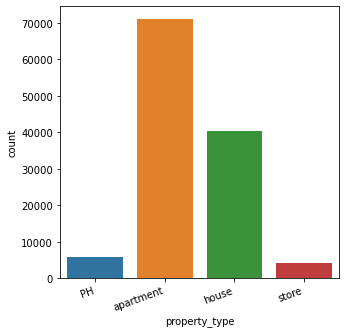

In [14]:
plt.figure(figsize=(5,5)) #tamaño barras
ax = sns.countplot(data=data, x= "property_type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")  #Buscar que era rotation =50 o 20
plt.show()

In [15]:
print(f'Cantidad de registros con NaN: {data.floor.isnull().sum()}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['floor']).size().reset_index(name='count'))

Cantidad de registros con NaN: 113321
Contamos cantidad de registros unicos:
      floor  count
0       1.0   2080
1       2.0   1542
2       3.0    914
3       4.0    658
4       5.0    484
..      ...    ...
177  1609.0      4
178  2103.0      1
179  2177.0      1
180  2509.0      1
181  3150.0      1

[182 rows x 2 columns]


In [16]:
#Necesito rellenar Floor, podria con los datos que tengo en Description y/o tittle

In [17]:
print(f'Cantidad de registros con NaN: {data.rooms.isnull().sum()}')
print(f'Cantidad de registros sin NaN: {data.rooms.notnull().sum()}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['rooms']).size().reset_index(name='count')) #Cantidad de registros por cantidad de habitacion


Cantidad de registros con NaN: 73830
Cantidad de registros sin NaN: 47390
Contamos cantidad de registros unicos:
    rooms  count
0     1.0   7377
1     2.0  12433
2     3.0  12567
3     4.0   7937
4     5.0   3782
5     6.0   1403
6     7.0    770
7     8.0    409
8     9.0    184
9    10.0    226
10   11.0     72
11   12.0     65
12   13.0     33
13   14.0     27
14   15.0     26
15   16.0     11
16   17.0     16
17   18.0      6
18   19.0      4
19   20.0     11
20   21.0      5
21   22.0      8
22   23.0      2
23   24.0      1
24   25.0      4
25   27.0      1
26   28.0      1
27   29.0      1
28   30.0      4
29   31.0      1
30   32.0      3


In [18]:
############ RELLENAR ROOMS ###############
#1- Busco en title el patron: cantidad de ambientes de 0 a +9, y la palabra amb o Amb o AMB o 2 a o 2 A
#2- Coloco el valor encontrado en columna que quiero rellenar (rooms) 
#3- Imprimo cantidad de nulos actual 
#4- Coloco "No encontrado" en los vacios 
#5- Comparo el antes de nulos vs el desp

In [19]:
import numpy as np                  ############## NO FUNCIONA, EN TITLE HAY 2 AMB Y NO LOS COLOCA EN VALOR_ROOMS #######
                                    ############## PROBE USANDO RE.COMPILE Y TAMPOCO VA #################################
pattern_rooms = r"([0-9]+)\s?amb\s?AM"
data["valor_rooms"]=data.title.str.extract(pattern_rooms) #Extraer de title
data.head()
#buscar_rooms_en_title=re.findall(r'pattern_rooms', data.title)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,valor_rooms
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,NaN
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,NaN
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,NaN
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,NaN
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,NaN


In [20]:
#Busco rooms/habitaciones en columna title usando Regex:       ######### NO FUNCIONA ########
                                                               #### Agregar en patron ?dor o ?DOR ########                    
import re 
pattern_rooms = r"([0-9]+)\s?amb"   #1 o mas digitos del 0 al 9 (0-9+) + algun simbolo q no sea espacio en blanco (/s) + amb opativo (?amb)
pattern_rooms_regex = re.compile(pattern_rooms, flags = re.IGNORECASE)
rooms_series=data.rooms
resultado=rooms_series.str.apply(lambda x: pattern_rooms_regex.findall(x)) #aplico patron de busqueda a toda la columna titulo
print(type(resultado)) #vemos lo que encontro en rooms_title
print(resultado)

AttributeError: Can only use .str accessor with string values!